## Ejercicio 3

x_T ≈ 64.6535


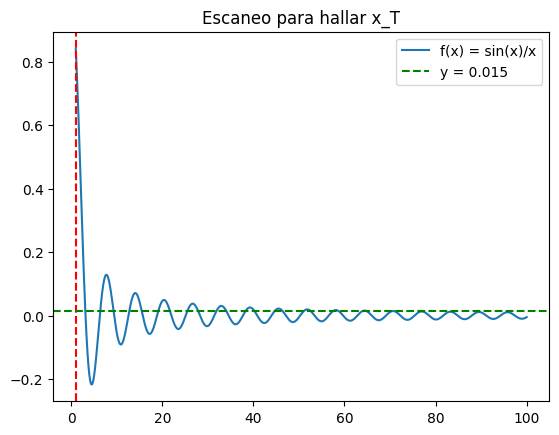

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def f(x):
    return np.sin(x)/x if x != 0 else 1

x_vals = np.linspace(1, 100, 10000)
y_vals = np.sinc(x_vals / np.pi)

for i, y in enumerate(y_vals):
    if all(y_vals[i:] < 0.015):
        x_T = x_vals[i]
        break

print(f"x_T ≈ {x_T:.4f}")

fig, ax = plt.subplots()
ax.plot(x_vals, y_vals, label='f(x) = sin(x)/x')
vline = ax.axvline(x_vals[0], color='red', linestyle='--')
ax.axhline(0.015, color='green', linestyle='--', label='y = 0.015')
ax.legend()
plt.title("Escaneo para hallar x_T")

def update(i):
    vline.set_xdata(x_vals[i])
    return vline,

ani = FuncAnimation(fig, update, frames=range(0, len(x_vals), 50), interval=10)
plt.show()

x_T ≈ 64.6535
GIF guardado como 'animacion_sinc.gif'


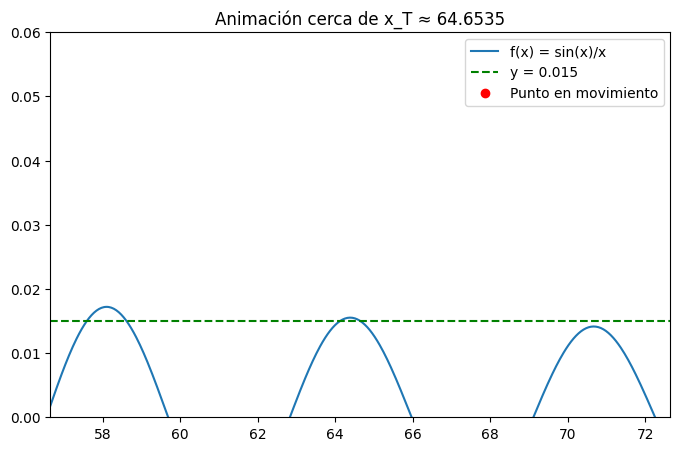

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Búsqueda de x_T
x_vals_global = np.linspace(1, 100, 10000)
y_vals_global = np.sinc(x_vals_global / np.pi)

for i, y in enumerate(y_vals_global):
    if all(y_vals_global[i:] < 0.015):
        x_T = x_vals_global[i]
        break

print(f"x_T ≈ {x_T:.4f}")

# Rango más amplio para la animación
x_vals = np.linspace(x_T - 8, x_T + 8, 500)
y_vals = np.sinc(x_vals / np.pi)

# Crear figura
fig, ax = plt.subplots(figsize=(8, 5))  # Tamaño más grande
ax.plot(x_vals, y_vals, label='f(x) = sin(x)/x')
ax.axhline(0.015, color='green', linestyle='--', label='y = 0.015')
point, = ax.plot([], [], 'ro', label='Punto en movimiento')
ax.set_xlim(x_vals[0], x_vals[-1])
ax.set_ylim(0, 0.06)  # Más espacio vertical
ax.legend()
plt.title(f"Animación cerca de x_T ≈ {x_T:.4f}")

# Inicialización
def init():
    point.set_data([], [])
    return point,

# Actualización del punto
def update(i):
    point.set_data([x_vals[i]], [y_vals[i]])
    return point,

# Animación
ani = FuncAnimation(fig, update, frames=len(x_vals), init_func=init, interval=30, blit=True)

# Guardar como GIF
ani.save("Ejercicio3.gif", writer=PillowWriter(fps=30))
print("GIF guardado como 'Ejercicio3.gif'")
